In [1]:
# import pandas, matplotlib, and statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('display.width', 80)
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
landtemps = pd.read_csv("data/landtemps2019avgs.csv")
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

# show some of the temperature rows 
landtemps[['station','country','latabs','elevation','avgtemp']].\
  sample(10, random_state=1)

,station,country,latabs,elevation,avgtemp
10526,NEW_FORK_LAKE,United States,43,"2,542",2
1416,NEIR_AGDM,Canada,51,"1,145",2
2230,CURICO,Chile,35,225,16
6002,LIFTON_PUMPING_STN,United States,42,"1,809",4
2106,HUAILAI,China,40,538,11
2090,MUDANJIANG,China,45,242,6
7781,CHEYENNE_6SW_MESONET,United States,36,694,15
10502,SHARKSTOOTH,United States,38,"3,268",4
11049,CHALLIS_AP,United States,45,"1,534",7
2820,METHONI,Greece,37,52,18


In [2]:
landtemps.describe()

,latabs,elevation,avgtemp
count,"12,095","12,095","12,095"
mean,40,589,11
std,13,762,9
min,0,-350,-61
25%,35,78,5
50%,41,271,10
75%,47,818,17
max,90,"9,999",34


In [3]:
landtemps.skew()

/var/folders/4z/xh0pw1bs5dj2v0yzc3s042yc0000gn/T/ipykernel_42585/2080800758.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  landtemps.skew()


latabs      -0
elevation    3
avgtemp     -0
dtype: float64

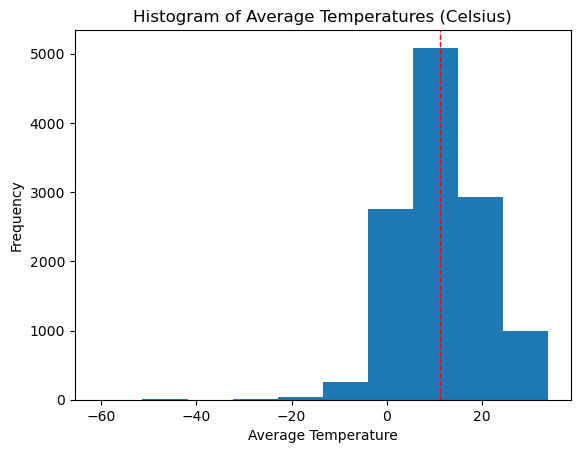

In [5]:
plt.hist(landtemps.avgtemp)
plt.axvline(landtemps.avgtemp.mean(), color = 'red', linestyle='dashed', linewidth=1)
plt.title("Histogram of Average Temperatures (Celsius)")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

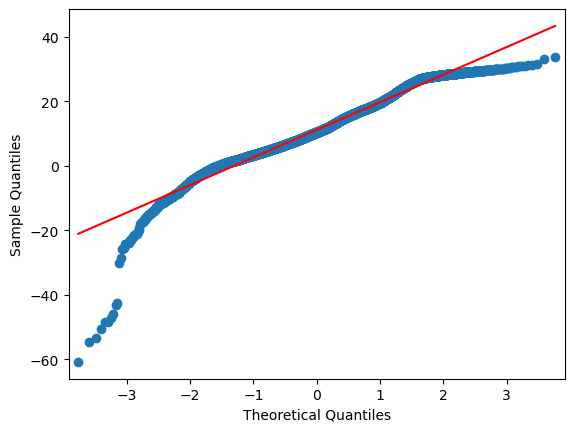

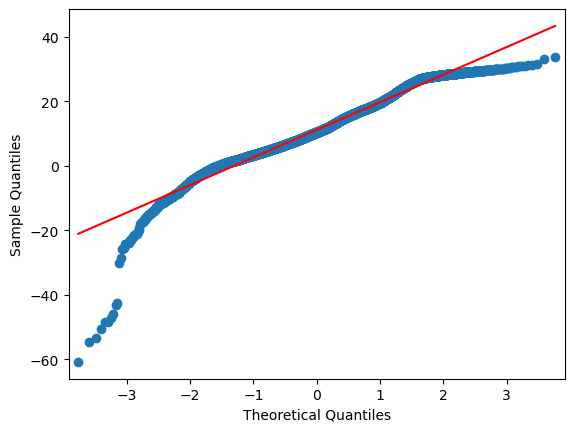

In [6]:
# Do a quantile quantile plot to check for normality, deviation from line would make it non normal
sm.qqplot(landtemps[['avgtemp']].sort_values(['avgtemp']), line = 's')

# The distribution is not normal

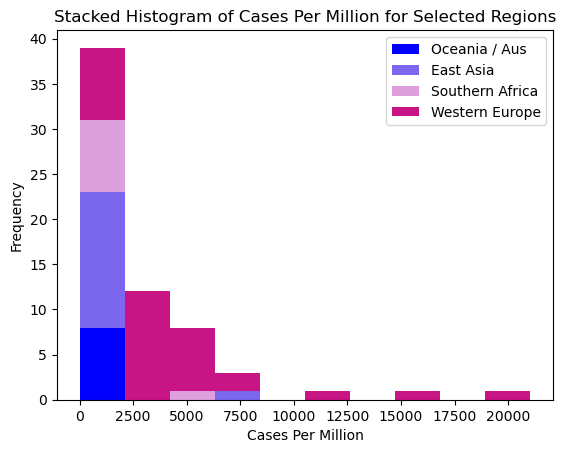

In [12]:
# Make a stacked histogram for each country
# do a stacked histogram # remember that .loc returns a dataframe
showregions = ['Oceania / Aus','East Asia','Southern Africa',
  'Western Europe']

def get_cases(regiondesc):
    return covidtotals.loc[covidtotals.region==regiondesc, 'total_cases_pm']


plt.hist([get_cases(k) for k in showregions], color = ['blue','mediumslateblue','plum','mediumvioletred'],\
  label=showregions,\
  stacked=True)
plt.title("Stacked Histogram of Cases Per Million for Selected Regions")
plt.xlabel("Cases Per Million")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 22500, step=2500))
plt.legend()
plt.show()


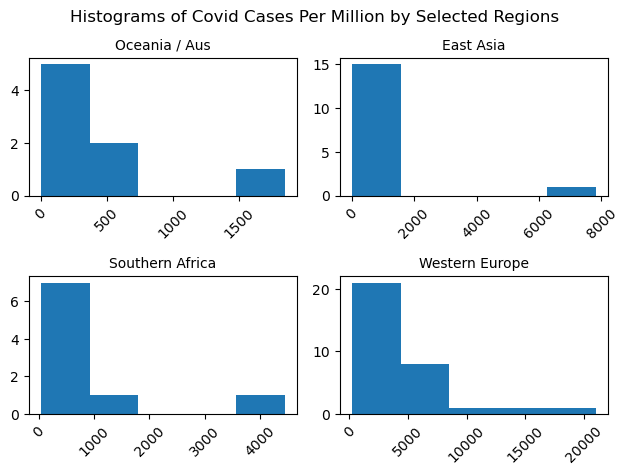

In [17]:
# show multiple histograms on one figure, ax.ravel() function enumerates the axes instead of getting the axes by their respective index
fig, axes = plt.subplots(2, 2)
fig.suptitle("Histograms of Covid Cases Per Million by Selected Regions")
axes = axes.ravel()

for j, ax in enumerate(axes):
  ax.hist(covidtotals.loc[covidtotals.region==showregions[j]].\
    total_cases_pm, bins=5)
  ax.set_title(showregions[j], fontsize=10)
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

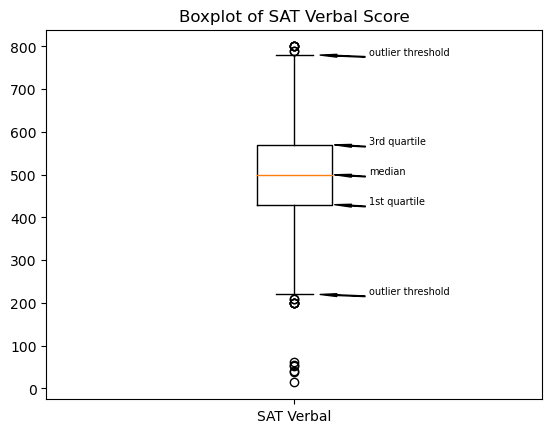

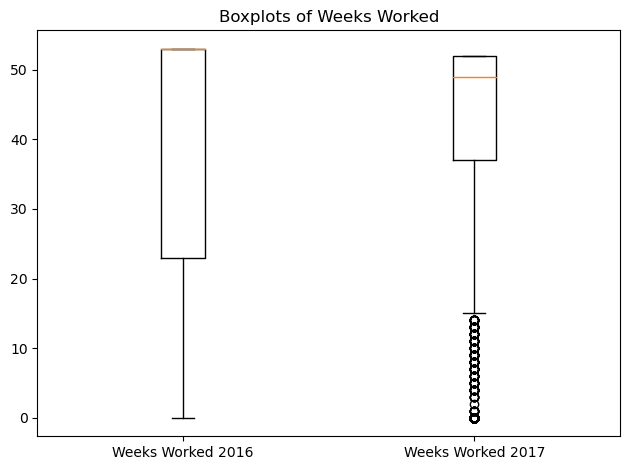

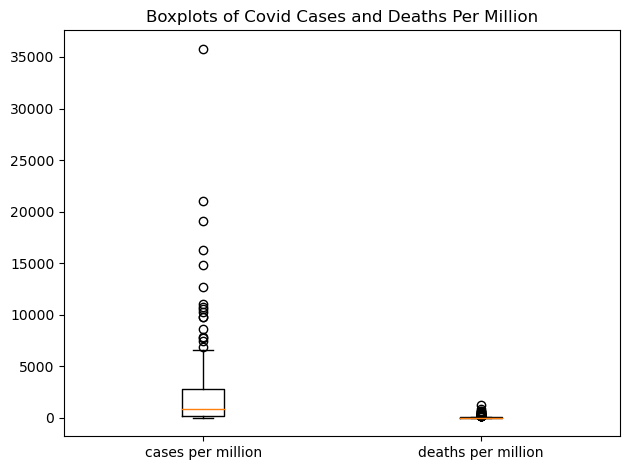

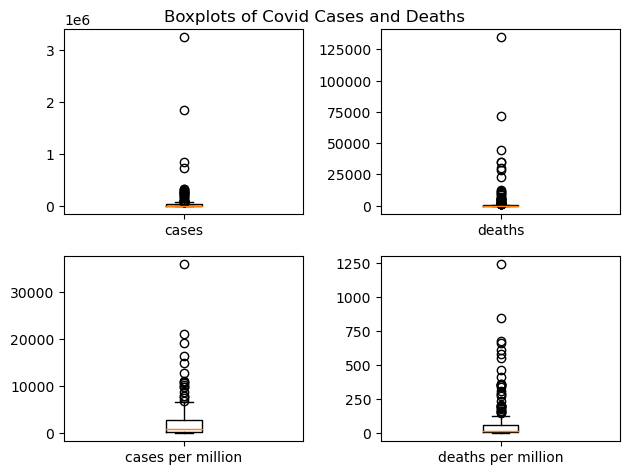

In [20]:
# Making box plots
# import pandas, matplotlib, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 80)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

# do a boxplot for SAT verbal
nls97.satverbal.describe()

plt.boxplot(nls97.satverbal.dropna(), labels=['SAT Verbal'])
plt.annotate('outlier threshold', xy=(1.05,780), xytext=(1.15,780), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('3rd quartile', xy=(1.08,570), xytext=(1.15,570), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('median', xy=(1.08,500), xytext=(1.15,500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('1st quartile', xy=(1.08,430), xytext=(1.15,430), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('outlier threshold', xy=(1.05,220), xytext=(1.15,220), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.title("Boxplot of SAT Verbal Score")
plt.show()

# show some descriptives on weeks worked
weeksworked = nls97.loc[:, ['highestdegree','weeksworked16',\
  'weeksworked17']]
weeksworked.describe()

# do a box plot of weeks worked in 2016 and 2017
plt.boxplot([weeksworked.weeksworked16.dropna(),
  weeksworked.weeksworked17.dropna()],
  labels=['Weeks Worked 2016','Weeks Worked 2017'])
plt.title("Boxplots of Weeks Worked")
plt.tight_layout()
plt.show()

# show some descriptives on coronavirus cases
totvars = ['total_cases','total_deaths','total_cases_pm',\
  'total_deaths_pm']
totvarslabels = ['cases','deaths','cases per million','deaths per million']
covidtotalsonly = covidtotals[totvars]
covidtotalsonly.describe()

# do a box plot of cases and deaths per million
fig, ax = plt.subplots()
plt.title("Boxplots of Covid Cases and Deaths Per Million")
ax.boxplot([covidtotalsonly.total_cases_pm,covidtotalsonly.total_deaths_pm],\
  labels=['cases per million','deaths per million'])
plt.tight_layout()
plt.show()

# show boxplots as separate sub plots on one figure
fig, axes = plt.subplots(2, 2,)
fig.suptitle("Boxplots of Covid Cases and Deaths")
axes = axes.ravel()

for j, ax in enumerate(axes):
  ax.boxplot(covidtotalsonly.iloc[:, j], labels=[totvarslabels[j]])

plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


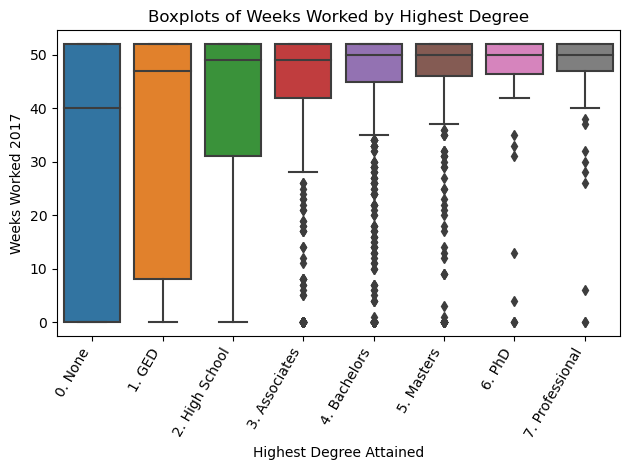

,min,qr1,med,qr3,max,count
region,,,,,,
Caribbean,95,252,339,"1,726","4,435",22
Central Africa,15,71,368,"1,538","3,317",11
Central America,93,925,"1,448","2,191","10,274",7
Central Asia,374,919,"1,974","2,907","10,594",6
East Africa,9,65,190,269,"5,015",13
East Asia,3,16,65,269,"7,826",16
Eastern Europe,347,883,"1,190","2,317","6,854",22
North Africa,105,202,421,427,793,5
North America,"2,290","2,567","2,844","6,328","9,812",3


In [33]:
# import pandas, matplotlib, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 80)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

# view some descriptive statistics
def gettots(x):
  out = {}
  out['min'] = x.min()
  out['qr1'] = x.quantile(0.25)
  out['med'] = x.median()
  out['qr3'] = x.quantile(0.75)
  out['max'] = x.max()
  out['count'] = x.count()
  return pd.Series(out)

nls97.groupby(['highestdegree'])['weeksworked17'].\
  apply(gettots).unstack()

# do boxplots for weeks worked by highest degree earned, order = '', sorts it along the different categories
myplt = sns.boxplot('highestdegree','weeksworked17', data=nls97,
  order=sorted(nls97.highestdegree.dropna().unique()))
myplt.set_title("Boxplots of Weeks Worked by Highest Degree")
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.tight_layout()
plt.show()

# view minimum, maximum, median, and first and third quartile values
covidtotals.groupby(['region'])['total_cases_pm'].\
  apply(gettots).unstack()

In [35]:
# groupby returns a series
covidtotals.groupby(['region'])['total_cases_pm'].mean()

region
Caribbean         1,098
Central Africa      934
Central America   2,578
Central Asia      3,117
East Africa         599
East Asia           615
Eastern Europe    1,917
North Africa        390
North America     4,982
Oceania / Aus       420
South America     4,154
South Asia        3,171
Southern Africa     710
West Africa         527
West Asia         5,335
Western Europe    4,550
Name: total_cases_pm, dtype: float64

In [37]:
# What does groupby do, it first groups and gives a series
covidtotals.groupby(['region'])['total_cases_pm'].\
  apply(gettots)

region                
Caribbean        min         95
                 qr1        252
                 med        339
                 qr3      1,726
                 max      4,435
                 count       22
Central Africa   min         15
                 qr1         71
                 med        368
                 qr3      1,538
                 max      3,317
                 count       11
Central America  min         93
                 qr1        925
                 med      1,448
                 qr3      2,191
                 max     10,274
                 count        7
Central Asia     min        374
                 qr1        919
                 med      1,974
                 qr3      2,907
                 max     10,594
                 count        6
East Africa      min          9
                 qr1         65
                 med        190
                 qr3        269
                 max      5,015
                 count       13
East Asia        

In [39]:
# Unstack option creates columns using series index
covidtotals.groupby(['region'])['total_cases_pm'].\
  apply(gettots).unstack()

,min,qr1,med,qr3,max,count
region,,,,,,
Caribbean,95,252,339,"1,726","4,435",22
Central Africa,15,71,368,"1,538","3,317",11
Central America,93,925,"1,448","2,191","10,274",7
Central Asia,374,919,"1,974","2,907","10,594",6
East Africa,9,65,190,269,"5,015",13
East Asia,3,16,65,269,"7,826",16
Eastern Europe,347,883,"1,190","2,317","6,854",22
North Africa,105,202,421,427,793,5
North America,"2,290","2,567","2,844","6,328","9,812",3


/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the poin

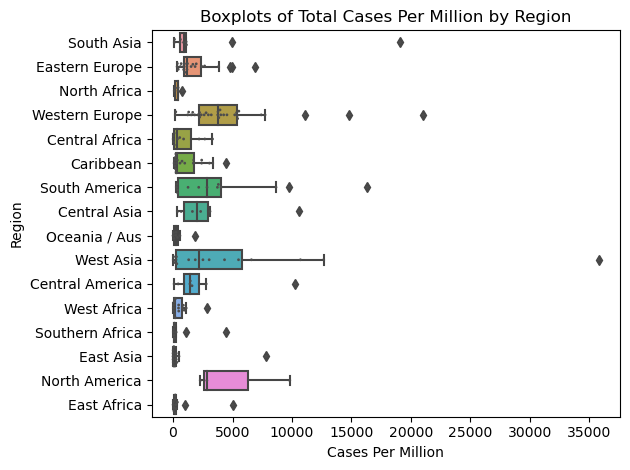

,location,total_cases_pm
iso_code,,
BHR,Bahrain,"19,082"
CHL,Chile,"16,323"
QAT,Qatar,"35,795"
SMR,San Marino,"21,038"
VAT,Vatican,"14,833"


In [40]:
# do boxplots for cases per million by region
sns.boxplot('total_cases_pm', 'region', data=covidtotals)
sns.swarmplot(y="region", x="total_cases_pm", data=covidtotals, size=2, color=".3", linewidth=0) # Draw a categorical scatterplot with non-overlapping points
plt.title("Boxplots of Total Cases Per Million by Region")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# show the most extreme value for covid totals
covidtotals.loc[covidtotals.total_cases_pm>=14000,\
  ['location','total_cases_pm']]

/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the point

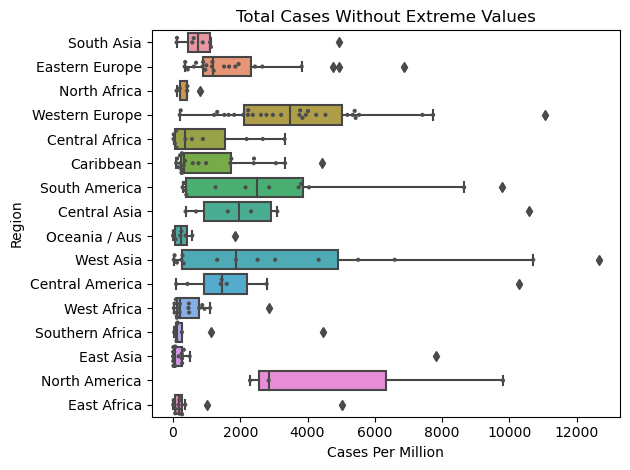

In [42]:
# do the same boxplots without the one extreme value in West Asia
sns.boxplot('total_cases_pm', 'region', data=covidtotals.loc[covidtotals.total_cases_pm<14000])
sns.swarmplot(y="region", x="total_cases_pm", data=covidtotals.loc[covidtotals.total_cases_pm<14000], size=3, color=".3", linewidth=0)
plt.title("Total Cases Without Extreme Values")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


ValueError: Image size of 545x288515 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

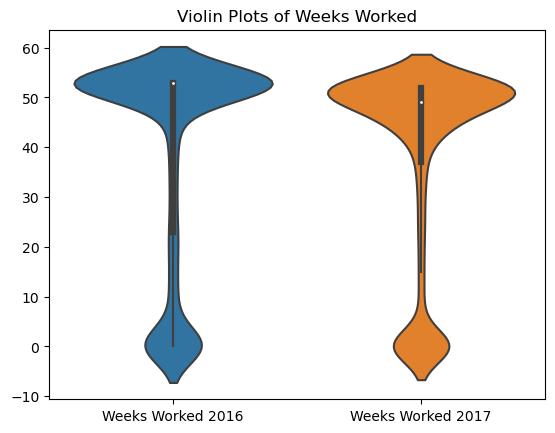

/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


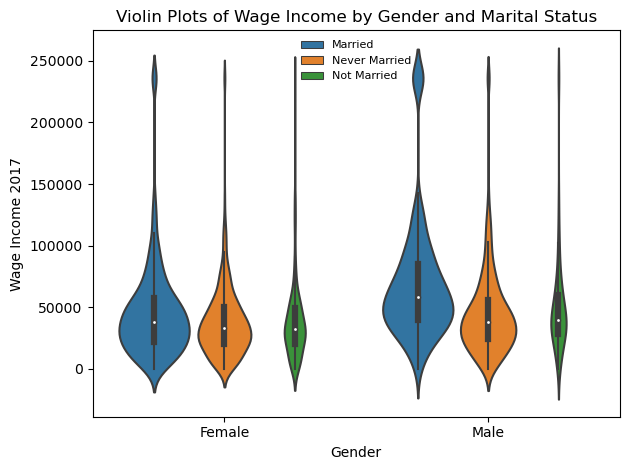

/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


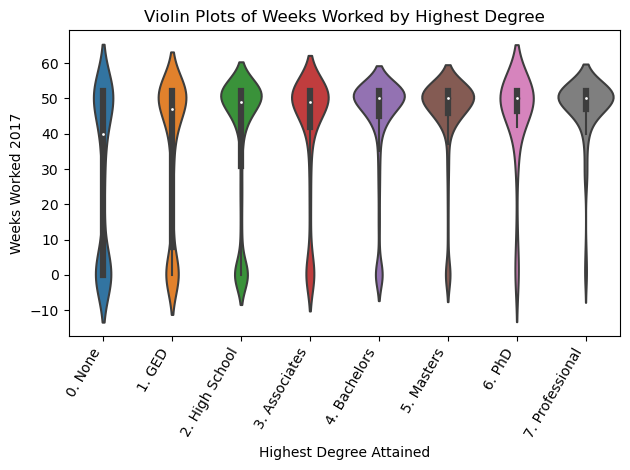

In [47]:
# import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 80)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])

covidtotals.set_index("iso_code", inplace=True)

# do a violin plot of sat verbal scores
sns.violinplot(nls97.satverbal, color="wheat", orient="v")
plt.title("Violin Plot of SAT Verbal Score")
plt.ylabel("SAT Verbal")
plt.text(0.08, 780, 'outlier threshold', horizontalalignment='center', size='x-small')
plt.text(0.065, nls97.satverbal.quantile(0.75), '3rd quartile', horizontalalignment='center', size='x-small')
plt.text(0.05, nls97.satverbal.median(), 'Median', horizontalalignment='center', size='x-small')
plt.text(0.065, nls97.satverbal.quantile(0.25), '1st quartile', horizontalalignment='center', size='x-small')
plt.text(0.08, 210, 'outlier threshold', horizontalalignment='center', size='x-small')
plt.text(-0.4, 500, 'frequency', horizontalalignment='center', size='x-small')
plt.show()

# get some descriptives
nls97.loc[:, ['weeksworked16','weeksworked17']].describe()

# show weeks worked for 2016 and 2017
myplt = sns.violinplot(data=nls97.loc[:, ['weeksworked16','weeksworked17']])
myplt.set_title("Violin Plots of Weeks Worked")
myplt.set_xticklabels(["Weeks Worked 2016","Weeks Worked 2017"])
plt.show()

# do a violin plot of wage income by gender
nls97["maritalstatuscollapsed"] = nls97.maritalstatus.\
  replace(['Married','Never-married','Divorced','Separated','Widowed'],\
  ['Married','Never Married','Not Married','Not Married','Not Married']) 
sns.violinplot(nls97.gender, nls97.wageincome, hue=nls97.maritalstatuscollapsed, scale="count")
plt.title("Violin Plots of Wage Income by Gender and Marital Status")
plt.xlabel('Gender')
plt.ylabel('Wage Income 2017')
plt.legend(title="", loc="upper center", framealpha=0, fontsize=8)
plt.tight_layout()
plt.show()

# do a violin plot of weeks worked by degree attainment
nls97 = nls97.sort_values(['highestdegree'])
myplt = sns.violinplot('highestdegree','weeksworked17', data=nls97)
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
myplt.set_title("Violin Plots of Weeks Worked by Highest Degree")
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
plt.tight_layout()
plt.show()

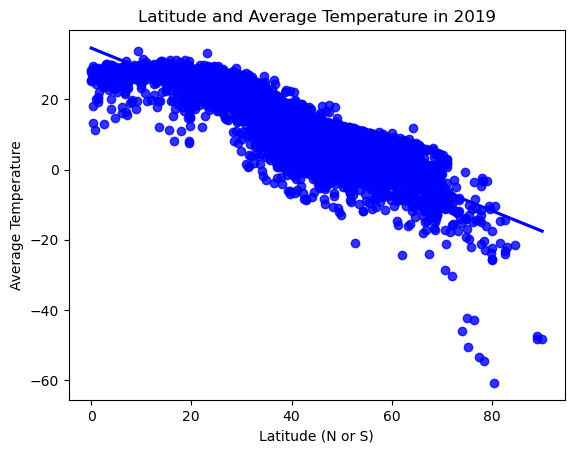

/Users/josepht/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


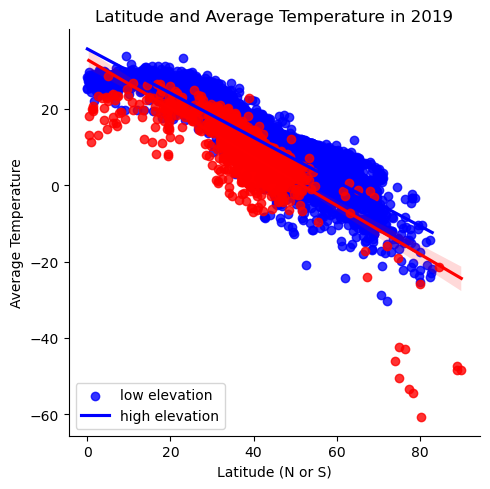

In [49]:
# Scatterplot
# show scatter plot with a regression line
sns.regplot(x="latabs", y="avgtemp", color="blue", data=landtemps)
plt.title("Latitude and Average Temperature in 2019")
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.show()

# show scatter plot with different regression lines by elevation group
landtemps['elevation_group'] = np.where(landtemps.elevation<=1000,'low','high')
sns.lmplot(x="latabs", y="avgtemp", hue="elevation_group", palette=dict(low="blue", high="red"), legend_out=False, data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.legend(('low elevation', 'high elevation'), loc='lower left')
plt.yticks(np.arange(-60, 40, step=20))
plt.title("Latitude and Average Temperature in 2019")
plt.tight_layout()
plt.show()



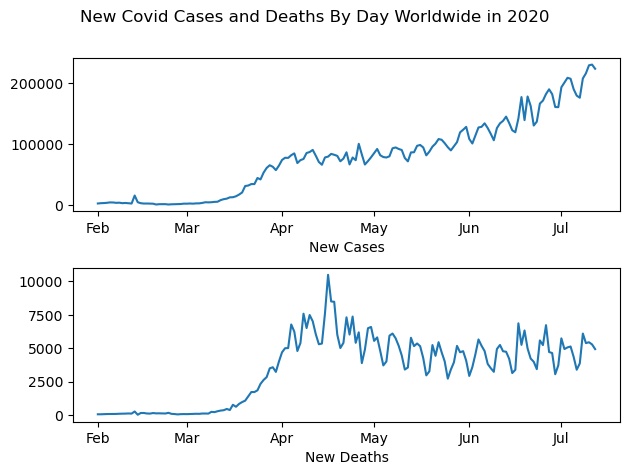

In [50]:
# Line plots


# import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
pd.set_option('display.width', 80)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
coviddaily = pd.read_csv("data/coviddaily720.csv", parse_dates=["casedate"])

# look at a couple of sample rows of the covid daily data
coviddaily.sample(2, random_state=1).T

# calculate new cases and deaths by day
coviddailytotals = coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].\
  groupby(['casedate'])[['new_cases','new_deaths']].\
  sum().\
  reset_index()

coviddailytotals.sample(7, random_state=1)

# show line charts for new cases and new deaths by day
fig = plt.figure()
plt.suptitle("New Covid Cases and Deaths By Day Worldwide in 2020")
ax1 = plt.subplot(2,1,1)
ax1.plot(coviddailytotals.casedate, coviddailytotals.new_cases)
ax1.xaxis.set_major_formatter(DateFormatter("%b"))
ax1.set_xlabel("New Cases")
ax2 = plt.subplot(2,1,2)
ax2.plot(coviddailytotals.casedate, coviddailytotals.new_deaths)
ax2.xaxis.set_major_formatter(DateFormatter("%b"))
ax2.set_xlabel("New Deaths")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

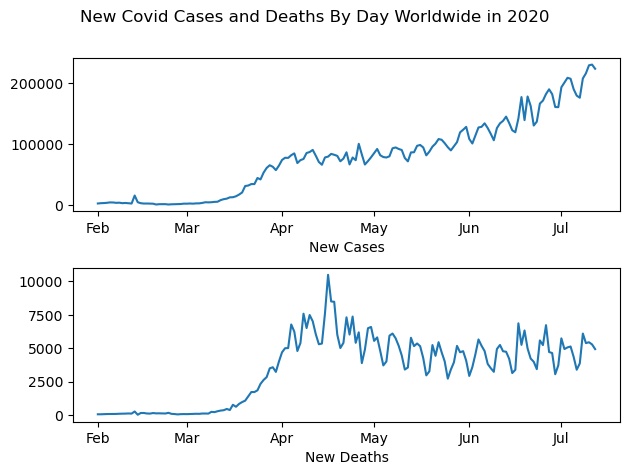

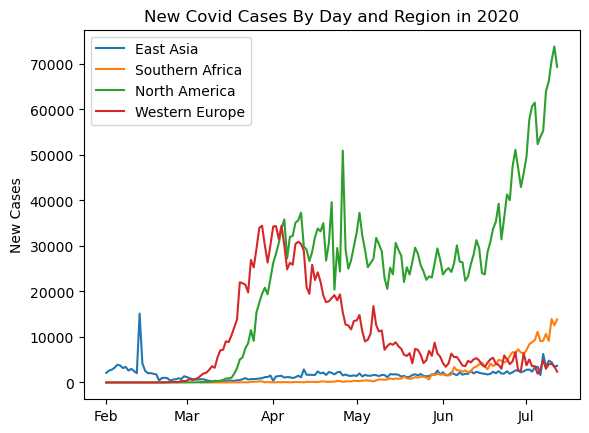

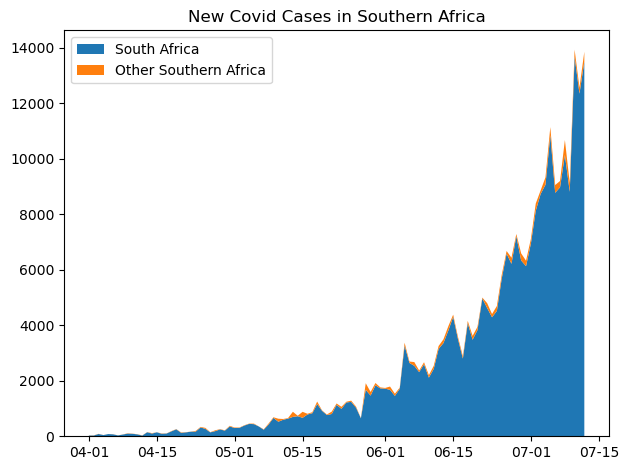

In [51]:
# line plots 

# import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
pd.set_option('display.width', 80)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
coviddaily = pd.read_csv("data/coviddaily720.csv", parse_dates=["casedate"])

# look at a couple of sample rows of the covid daily data
coviddaily.sample(2, random_state=1).T

# calculate new cases and deaths by day
coviddailytotals = coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].\
  groupby(['casedate'])[['new_cases','new_deaths']].\
  sum().\
  reset_index()

coviddailytotals.sample(7, random_state=1)

# show line charts for new cases and new deaths by day
fig = plt.figure()
plt.suptitle("New Covid Cases and Deaths By Day Worldwide in 2020")
ax1 = plt.subplot(2,1,1)
ax1.plot(coviddailytotals.casedate, coviddailytotals.new_cases)
ax1.xaxis.set_major_formatter(DateFormatter("%b"))
ax1.set_xlabel("New Cases")
ax2 = plt.subplot(2,1,2)
ax2.plot(coviddailytotals.casedate, coviddailytotals.new_deaths)
ax2.xaxis.set_major_formatter(DateFormatter("%b"))
ax2.set_xlabel("New Deaths")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

# calculate new cases and new deaths by region and day
regiontotals = coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].\
  groupby(['casedate','region'])[['new_cases','new_deaths']].\
  sum().\
  reset_index()
regiontotals.sample(7, random_state=1)

# show plot of new cases by selected regions
showregions = ['East Asia','Southern Africa','North America',
  'Western Europe']

for j in range(len(showregions)):
  rt = regiontotals.loc[regiontotals.region==showregions[j],
    ['casedate','new_cases']]
  plt.plot(rt.casedate, rt.new_cases, label=showregions[j])

plt.title("New Covid Cases By Day and Region in 2020")
plt.gca().get_xaxis().set_major_formatter(DateFormatter("%b"))
plt.ylabel("New Cases")
plt.legend()
plt.show()

# take a closer look at the South Africa counts
af = regiontotals.loc[regiontotals.region=='Southern Africa',
  ['casedate','new_cases']].rename(columns={'new_cases':'afcases'})
sa = coviddaily.loc[coviddaily.location=='South Africa',
  ['casedate','new_cases']].rename(columns={'new_cases':'sacases'})
af = pd.merge(af, sa, left_on=['casedate'], right_on=['casedate'], how="left")
af.sacases.fillna(0, inplace=True)
af['afcasesnosa'] = af.afcases-af.sacases
afabb = af.loc[af.casedate.between('2020-04-01','2020-07-12')]

fig = plt.figure()
ax = plt.subplot()
ax.stackplot(afabb.casedate, afabb.sacases, afabb.afcasesnosa, labels=['South Africa','Other Southern Africa'])
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.title("New Covid Cases in Southern Africa")
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

In [52]:
# Changing series conditionally numpy.where(condition, [x, y, ]/) #x and y are values that will be replaced to if its True of False respectively# import pandas and numpy, and load the nls and land temperatures data
# This code block uses nested np where
# numpy select numpy.select(condlist, choicelist, default=0) # used to create a new numpy array using a list of conditions
"""x = np.arange(6)
condlist = [x<3, x>3]
choicelist = [x, x**2]
np.select(condlist, choicelist, 42)
"""
import pandas as pd
import numpy as np
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 35)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format
nls97 = pd.read_csv("data/nls97b.csv")
nls97.set_index("personid", inplace=True)
landtemps = pd.read_csv("data/landtemps2019avgs.csv")

# use the numpy where function to create a categorical series with 2 values

landtemps.elevation.quantile(np.arange(0.2,1.1,0.2))

landtemps['elevation_group'] = np.where(landtemps.elevation>\
  landtemps.elevation.quantile(0.8),'High','Low') # Nested np where
landtemps.elevation_group = landtemps.elevation_group.astype('category')
landtemps.groupby(['elevation_group'])['elevation'].agg(['count','min','max'])

# use the numpy where function to create a categorical series with 3 values
landtemps.elevation.median()
landtemps['elevation_group'] = np.where(landtemps.elevation>
  landtemps.elevation.quantile(0.8),'High',np.where(landtemps.elevation>
  landtemps.elevation.median(),'Medium','Low'))

# numpy select example to conditionally create new series 
landtemps.elevation_group = landtemps.elevation_group.astype('category')
landtemps.groupby(['elevation_group'])['elevation'].agg(['count','min','max'])

# use numpy select to evaluate a list of conditions
test = [(nls97.gpaoverall<2) & (nls97.highestdegree=='0. None'), nls97.highestdegree=='0. None', nls97.gpaoverall<2]
result = ['1. Low GPA and No Diploma','2. No Diploma','3. Low GPA']
nls97['hsachieve'] = np.select(test, result, '4. Did Okay')
nls97[['hsachieve','gpaoverall','highestdegree']].head()
#nls97.hsachieve.value_counts().sort_index()

# Apply to get a categorical series

# use apply and lambda to create a more complicated categorical series
def getsleepdeprivedreason(row):
  sleepdeprivedreason = "Unknown"
  if (row.nightlyhrssleep>=6):
    sleepdeprivedreason = "Not Sleep Deprived"
  elif (row.nightlyhrssleep>0):
    if (row.weeksworked16+row.weeksworked17 < 80):
      if (row.childathome>2):
        sleepdeprivedreason = "Child Rearing"
      else:
        sleepdeprivedreason = "Other Reasons"
    else:
      if (row.wageincome>=62000 or row.highestgradecompleted>=16):
        sleepdeprivedreason = "Work Pressure"
      else:
        sleepdeprivedreason = "Income Pressure"
  else:
    sleepdeprivedreason = "Unknown"
  return sleepdeprivedreason

nls97['sleepdeprivedreason'] = nls97.apply(getsleepdeprivedreason, axis=1)
nls97.sleepdeprivedreason = nls97.sleepdeprivedreason.astype('category')
nls97.sleepdeprivedreason.value_counts()



FileNotFoundError: [Errno 2] No such file or directory: 'data/nls97b.csv'